In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CovidDataset.csv')
df = df.replace({'Yes': 1, 'No': 0})
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


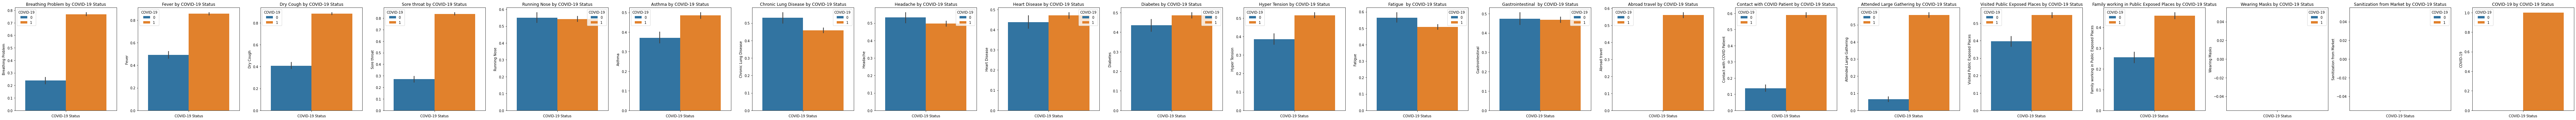

In [3]:
# Select numerical columns (replace or modify with your own column selection logic)
numerical_columns = df.select_dtypes(include=["number"]).columns

# Check if there are any numerical columns
if numerical_columns.empty:
    print("No numerical columns to plot!")
else:
    # Number of columns for subplots
    n_cols = len(numerical_columns)
    n_rows = 1  # Adjust this based on how many columns you have

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, 5))

    # If only one column, axes is a single axis, so we make it iterable
    if n_cols == 1:
        axes = [axes]

    # Iterate over numerical columns and plot the barplot
    for ax, col in zip(axes, numerical_columns):
        sns.barplot(hue='COVID-19', y=col, data=df, ax=ax)
        ax.set_title(f'{col} by COVID-19 Status')
        ax.set_xlabel('COVID-19 Status')
        ax.set_ylabel(f'{col}')

    plt.tight_layout()
    plt.show()

In [4]:
TRASH = ['Wearing masks', 'Sanitization from market']
BAD = ['Running Nose','Chronic Lung Disease','Headache','Heart Disease','Diabetes','Fatigue','Gastrointestinal']#50/50
MAYBE = ['Asthma','Hyper Tension','Visited Public Exposed Places', 'Family working in public exposed places']
GOOD = ['Breathing Problem','Fever','Dry Cough','Sore throat','Contact with COVID patient','Attended Large Gathering']
PERFECT = ['Abroad Travel']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix

In [6]:
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Prepare data for scikit-learn
X = df[['Breathing Problem','Fever','Dry Cough','Sore throat','Contact with COVID Patient','Attended Large Gathering','Abroad travel']]
y = df['COVID-19']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred_NB = model.predict(X_test)

# Evaluate the model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
precision_NB = precision_score(y_test, y_pred_NB)
recall_NB = recall_score(y_test, y_pred_NB)
f1_NB = f1_score(y_test,y_pred_NB) 


print(f'Accuracy: {accuracy_NB}')
print(f'Precision: {precision_NB}')
print(f'Recall: {recall_NB}')
print(f'F1_score: {f1_NB}')
print(X)

Accuracy: 0.7939282428702852
Precision: 1.0
Recall: 0.746606334841629
F1_score: 0.8549222797927462
      Breathing Problem  Fever  Dry Cough  Sore throat  \
0                     1      1          1            1   
1                     1      1          1            1   
2                     1      1          1            1   
3                     1      1          1            0   
4                     1      1          1            1   
...                 ...    ...        ...          ...   
5429                  1      1          0            1   
5430                  1      1          1            0   
5431                  1      1          1            0   
5432                  1      1          1            0   
5433                  1      1          1            0   

      Contact with COVID Patient  Attended Large Gathering  Abroad travel  
0                              1                         0              0  
1                              0                    

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_spec = KNeighborsClassifier(n_neighbors=3)

In [34]:
knn_fit = knn_spec.fit(X_train, y_train)
y_pred_knn = knn_fit.predict(X_test)

In [35]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn) 
print(f'Accuracy: {accuracy_knn}')
print(f'Precision: {precision_knn}')
print(f'Recall: {recall_knn}')
print(f'F1_score: {f1_knn}')

Accuracy: 0.9714811407543699
Precision: 0.9723145071982281
Recall: 0.9932126696832579
F1_score: 0.9826524902070509


In [12]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [29]:
max_depth = 7
DTmodel = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
DTmodel.fit(X_train, y_train)
y_pred_DT = DTmodel.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test,y_pred_DT) 
print(f'Accuracy: {accuracy_DT}')
print(f'Precision: {precision_DT}')
print(f'Recall: {recall_DT}')
print(f'F1_score: {f1_DT}')

Accuracy: 0.9714811407543699
Precision: 0.9723145071982281
Recall: 0.9932126696832579
F1_score: 0.9826524902070509


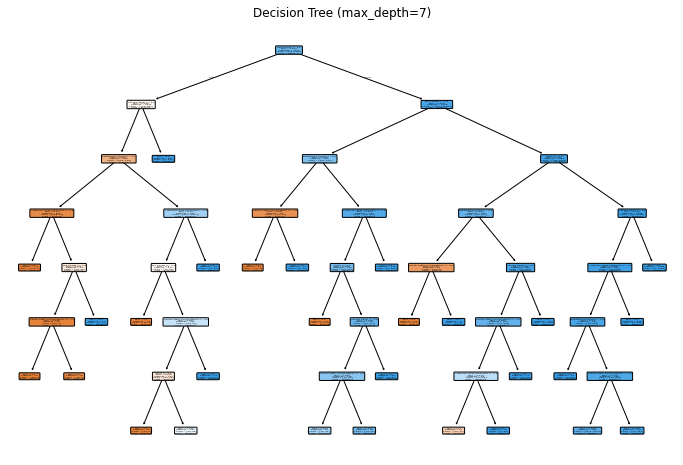

In [14]:
plt.figure(figsize=(12, 8))  # Size of the plot
plot_tree(DTmodel, filled=True, feature_names=X.columns.tolist(), class_names = ['Positive','Negative'],rounded=True)
plt.title(f"Decision Tree (max_depth={max_depth})")
plt.show()

In [15]:
from sklearn.metrics import roc_curve, auc

In [16]:
fpr_n,tpr_n,thresholds_n = roc_curve(y_test,y_pred_NB)
fpr_k,tpr_k,thresholds_k = roc_curve(y_test,y_pred_knn)
fpr_d,tpr_d,thresholds_d = roc_curve(y_test,y_pred_DT)
roc_auc_n = auc(fpr_n, tpr_n)
roc_auc_k = auc(fpr_k, tpr_k)
roc_auc_d = auc(fpr_d, tpr_d)

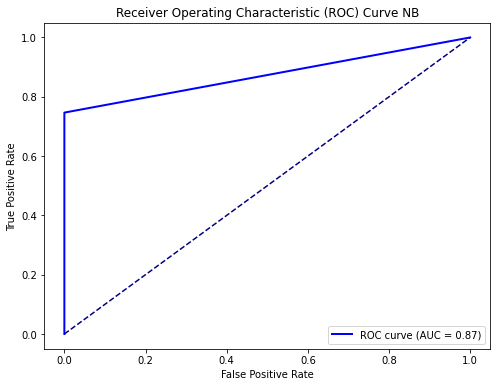

In [25]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_n, tpr_n, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_n:.2f})')

# Plot the diagonal (chance line)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve NB')
plt.legend(loc='lower right')
plt.show()

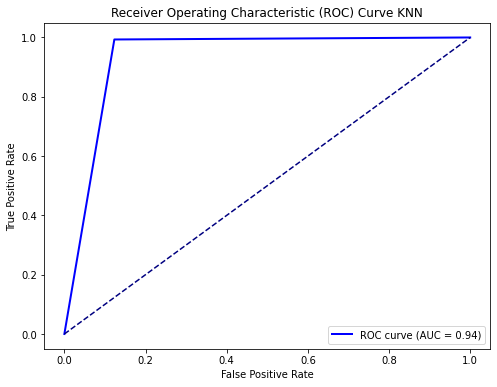

In [24]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_k, tpr_k, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_k:.2f})')

# Plot the diagonal (chance line)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve KNN')
plt.legend(loc='lower right')
plt.show()

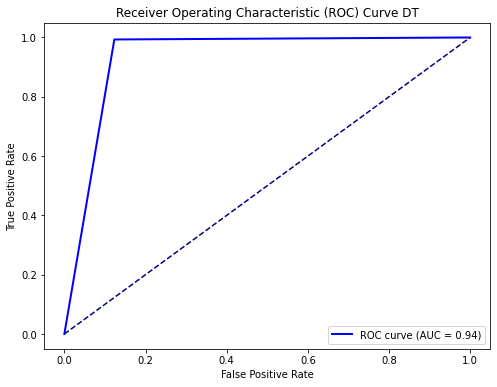

In [23]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_d, tpr_d, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_d:.2f})')

# Plot the diagonal (chance line)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve DT')
plt.legend(loc='lower right')
plt.show()

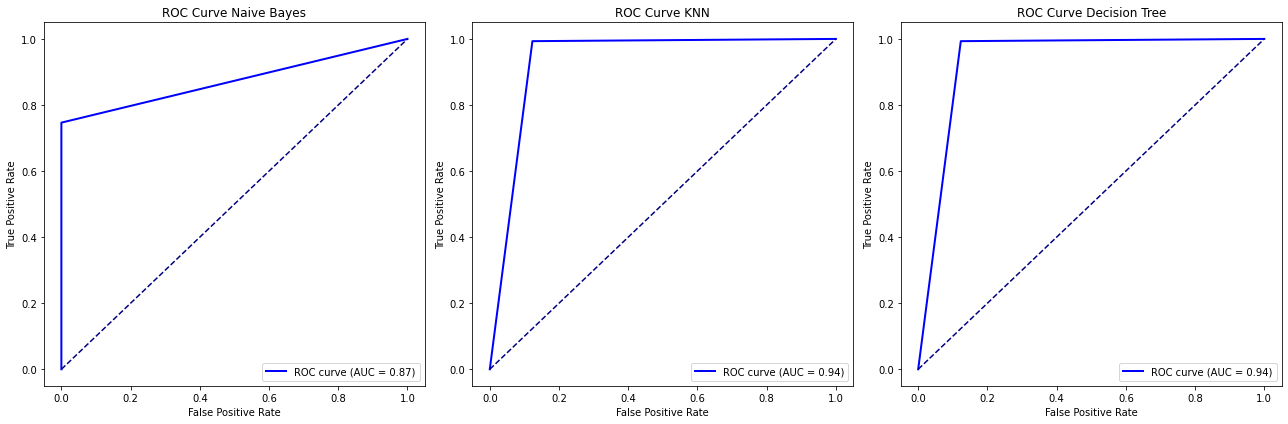

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot ROC curve for Naive Bayes
axes[0].plot(fpr_n, tpr_n, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_n:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve Naive Bayes')
axes[0].legend(loc='lower right')

# Plot ROC curve for KNN
axes[1].plot(fpr_k, tpr_k, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_k:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve KNN')
axes[1].legend(loc='lower right')

# Plot ROC curve for Decision Tree
axes[2].plot(fpr_d, tpr_d, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_d:.2f})')
axes[2].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('ROC Curve Decision Tree')
axes[2].legend(loc='lower right')

# Adjust layout to avoid overlap between subplots
plt.tight_layout()

# Show the figure with all three ROC curves
plt.show()

Confusion Matrix:
[[203   0]
 [224 660]]


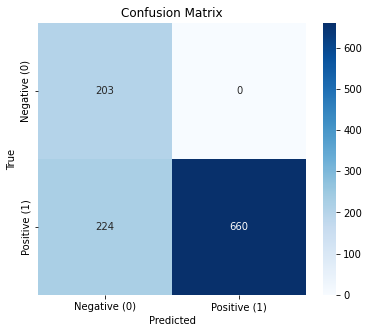

In [20]:
# Generate the confusion matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_NB)

# Optional: Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm_NB, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative (0)', 'Positive (1)'], yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[178  25]
 [  6 878]]


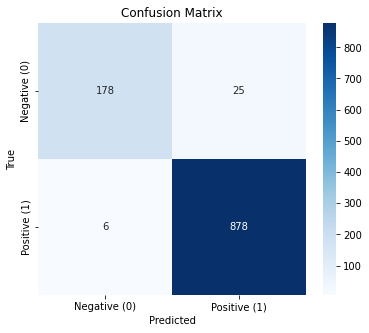

In [21]:
# Generate the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_knn)

# Optional: Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative (0)', 'Positive (1)'], yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[178  25]
 [  6 878]]


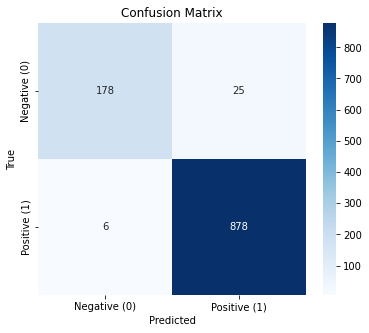

In [22]:
# Generate the confusion matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_DT)

# Optional: Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm_DT, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative (0)', 'Positive (1)'], yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()